In [124]:
#This program will do data analysis on the excel file scraped from yahoo finances that contains stocks
#Using chardet I was able to determine that ISO-8859-1 encryption is used
import pandas as pd
import chardet

#Specify correct file path
file = 'market_data.csv'

#Detect file encoding using chardet
with open(file, 'rb') as f:
    result = chardet.detect(f.read())

#Read the CSV file using  detected encoding
dataset = pd.read_csv(file, encoding = result['encoding'])

In [129]:
#We will now do some basic examination of the excel file (despite being the creator) should contain 116 rows with 8 headers each

#Check the shape of the DataFrame, rows, cols
print("Shape of the DataFrame:", dataset.shape)

#Check the size of the DataFrame, total elements
print("Size of the DataFrame:", dataset.size)

#Display first few rows of the DataFrame
print(dataset.head())

Shape of the DataFrame: (116, 8)
Size of the DataFrame: 928
                          Stock Name  Market Price  Market Change  \
0        Meta Platforms, Inc. (META)        320.02          -4.80   
1               GameStop Corp. (GME)         16.98           1.68   
2     Robinhood Markets, Inc. (HOOD)          9.55           0.23   
3  Palantir Technologies Inc. (PLTR)         18.40          -1.87   
4                    Nokia Oyj (NOK)          3.16          -0.33   

   Market Change Percent  Previous Close  Market Open     Market Range  \
0                  -1.48          324.82       317.29  313.66 - 320.86   
1                  10.98           15.30        15.29    14.91 - 17.41   
2                   2.47            9.32         9.46      9.33 - 9.73   
3                  -9.23           20.27        19.75    18.27 - 19.90   
4                  -9.46            3.49         3.22  3.1600 - 3.2591   

  Market Share Volume Available  
0                    18,637,140  
1           

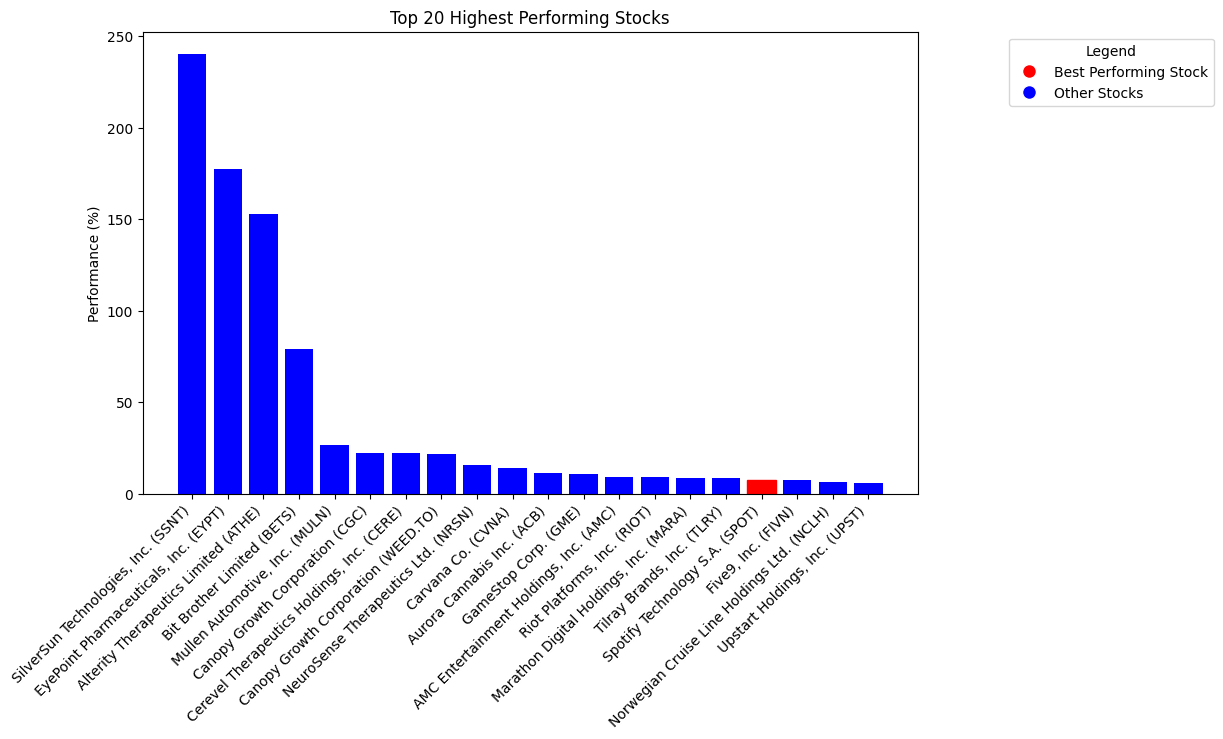

In [126]:
#This portion of code will attempt to answer the question: Which stock performed most reliably and profitably? (which would I want to invest in) this would be done by calculating the percent change in the stock price from beginnning to end of the period. 
#For visibility purposes we will only examine the top 20 performing stocks (it will be extremely clutterd if we attempted to plot all 116 stocks)
#Import neccessary libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Ensure 'Performance' column is in string format
dataset['Market Change Percent'] = dataset['Market Change Percent'].astype(str)

#Remove percentage sign, convert to float, and add data labels
dataset['Market Change Percent'] = dataset['Market Change Percent'].apply(lambda x: float(x.rstrip('%')))

#Selecting the top 20 highest performing stocks
top_20_stocks = dataset.nlargest(20, 'Market Change Percent')

# Set a larger figure size
plt.figure(figsize = (10, 6))

#Plotting the performance of each stock
colors = ['blue'] * len(top_20_stocks)
bars = plt.bar(top_20_stocks['Stock Name'], top_20_stocks['Market Change Percent'], color = colors)

#Highlight the best performing stock
best_stock_index = top_20_stocks.index[top_20_stocks['Market Change Percent'].idxmax()]
bars[best_stock_index].set_color('red')

#Adding labels and title
plt.ylabel('Performance (%)')
plt.title('Top 20 Highest Performing Stocks')
plt.xticks(rotation = 45, ha = 'right')

#Create custom legend (again for visibility purposes)
legend_elements = [
    Line2D([0], [0], marker = 'o', color = 'w', label = 'Best Performing Stock', markerfacecolor = 'red', markersize = 10),
    Line2D([0], [0], marker = 'o', color = 'w', label = 'Other Stocks', markerfacecolor = 'blue', markersize = 10)
]

plt.legend(handles = legend_elements, loc = 'upper center', bbox_to_anchor = (1.25, 1), title = 'Legend')

#Display results
plt.show()

#Despite what we might intially think viewing the data and graph; we can observe that SilverSun TEchnologies, Inc. (SSNT) even with such a substantial positive market change percentage, is not in fact the best performing stock. 
#This is incredibly surprising to me because, when first viewing the data I thought it would be fairly obvious, but due to multiple factors at play (further examined in my analysis report) Spotify Technology S.A. (SPOT) 
#turns out to be the BEST stock dues to reliablity/consistent profitability and it is a good idea to invest in SPOT stock

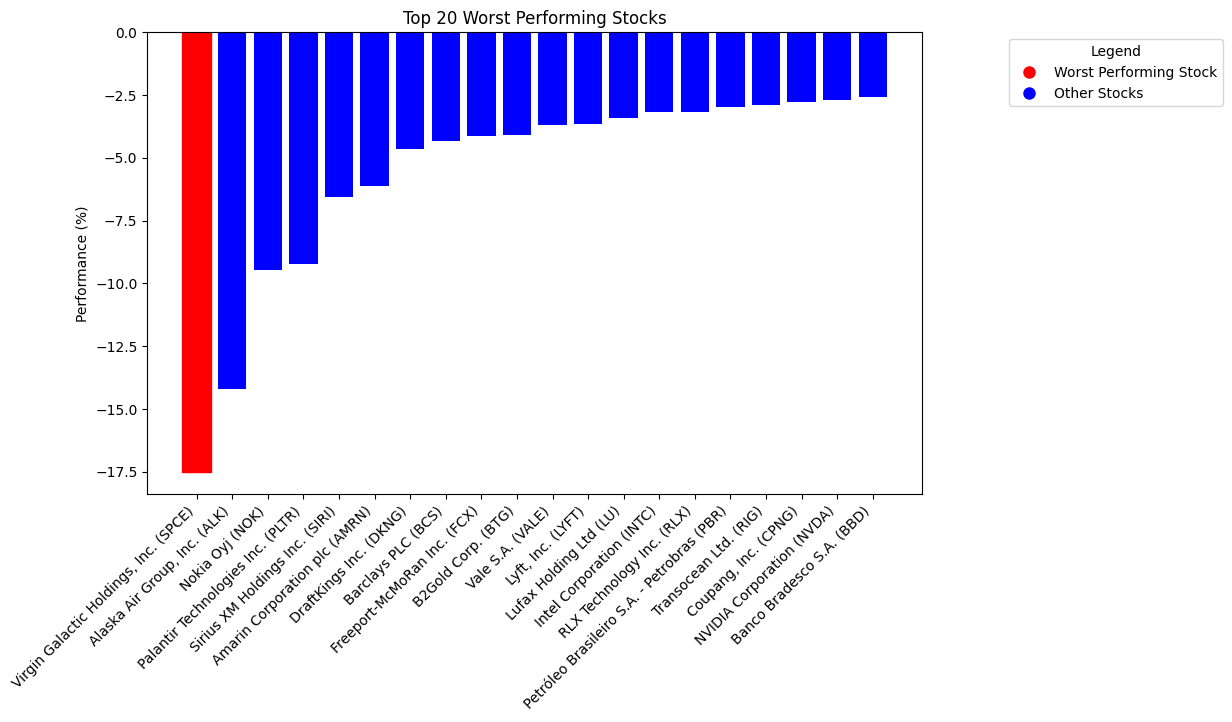

In [127]:
#This portion of code will attempt to answer the question: Which stock performed least reliably and profitably? (which would I want to avoid investing in) this would be done by calculating the percent change in the stock price from beginnning to end of the period. 
#For visibility purposes we will only examine the top 20 worst performing stocks 
#Import neccessary libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Ensure 'Market Change Percent' column is in string format
dataset['Market Change Percent'] = dataset['Market Change Percent'].astype(str)

#Remove percentage sign, convert to float, and add data labels
dataset['Market Change Percent'] = dataset['Market Change Percent'].apply(lambda x: float(x.rstrip('%')))

#Selecting top 20 worst-performing stocks
bottom_20_stocks = dataset.nsmallest(20, 'Market Change Percent')

#Set a larger figure size
plt.figure(figsize = (10, 6))

#Plotting performance of each stock
colors = ['blue'] * len(bottom_20_stocks)
bars = plt.bar(bottom_20_stocks['Stock Name'], bottom_20_stocks['Market Change Percent'], color = colors)

#Highlight worst-performing stock
worst_stock_index = bottom_20_stocks['Market Change Percent'].idxmin()
bars[bottom_20_stocks.index.get_loc(worst_stock_index)].set_color('red')

#Adding labels and title
plt.ylabel('Performance (%)')
plt.title('Top 20 Worst Performing Stocks')
plt.xticks(rotation = 45, ha = 'right')

#Adding legend (for visibility purposes)
#Create custom legend
legend_elements = [
    Line2D([0], [0], marker = 'o', color = 'w', label = 'Worst Performing Stock', markerfacecolor = 'red', markersize = 10),
    Line2D([0], [0], marker = 'o', color = 'w', label = 'Other Stocks', markerfacecolor = 'blue', markersize = 10)
]
plt.legend(handles = legend_elements, loc = 'upper center', bbox_to_anchor = (1.25, 1), title = 'Legend')

#Display results
plt.show()

#As expected when examining the data, Virgin Galatic Holdings, Inc. (SPCE) performed the worst on the given day with a -17.52% market price change. This indicates that they has the largest NEGATIVE price fluctuation 
#and consistent unreliability, it is a good idea to avoid investing in SPCE stock